# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [43]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
x = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MEDV'])


In [44]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
y.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [21]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [46]:
x.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [23]:
y.isnull().sum()

MEDV    0
dtype: int64

In [47]:
x.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

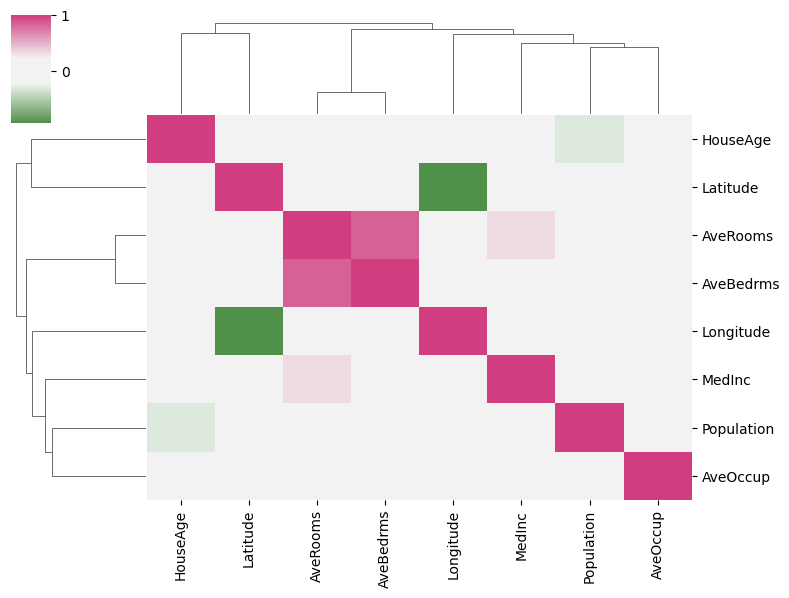

In [48]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(x.corr(), figsize=(8, 6), center = 0, cmap=cmap,)


**Análise:**
Observamos que a correlação negativa entre as varivéis Idade da casa(HouseAge) e Qtde Pessoas(Population).
Existe correlação positiva entre as variáveis Média de quartos(AveRooms) e Renda média(MedInc). 

### 3. Separe os dados em validação e teste

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [51]:
regr_1 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)

R_Quadrado1 = regr_1.score(X_test, y_test)
R_Quadrado1

0.7010767249535705

In [52]:
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_2.fit(X_train, y_train)

R_Quadrado2 = regr_2.score(X_test, y_test)
R_Quadrado2

0.45626614126279597

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [53]:
mse_1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse_1

0.3959106608212744

In [54]:
mse_2 = mean_squared_error(y_test, regr_2.predict(X_test))
mse_2

0.72015145455004

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Com base em quanto menor o SME, melhor está o modelo e com isso as previsões são as mais próximas dos valores reais.
Quanto maior o R-Quadrado, melhor os dados se encaixam ao modelo.
Acredito que o melhor modelo seja o primeiro.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

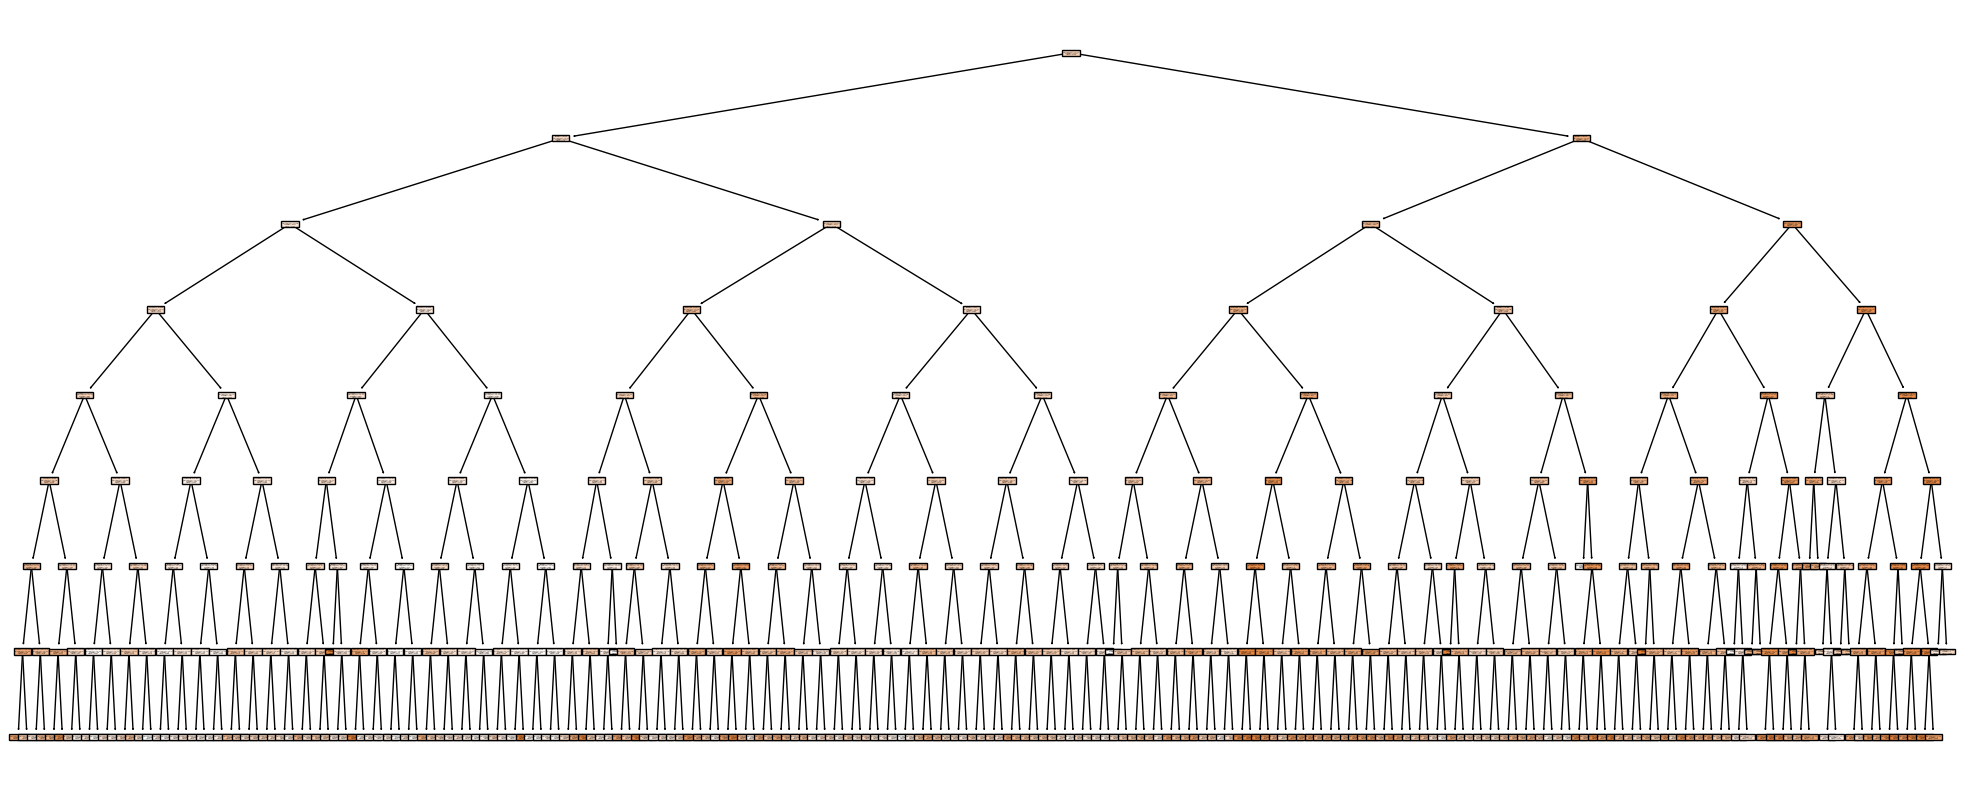

In [56]:
plt.rc('figure', figsize=(25, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=list(x.columns),  
                    filled=True) 


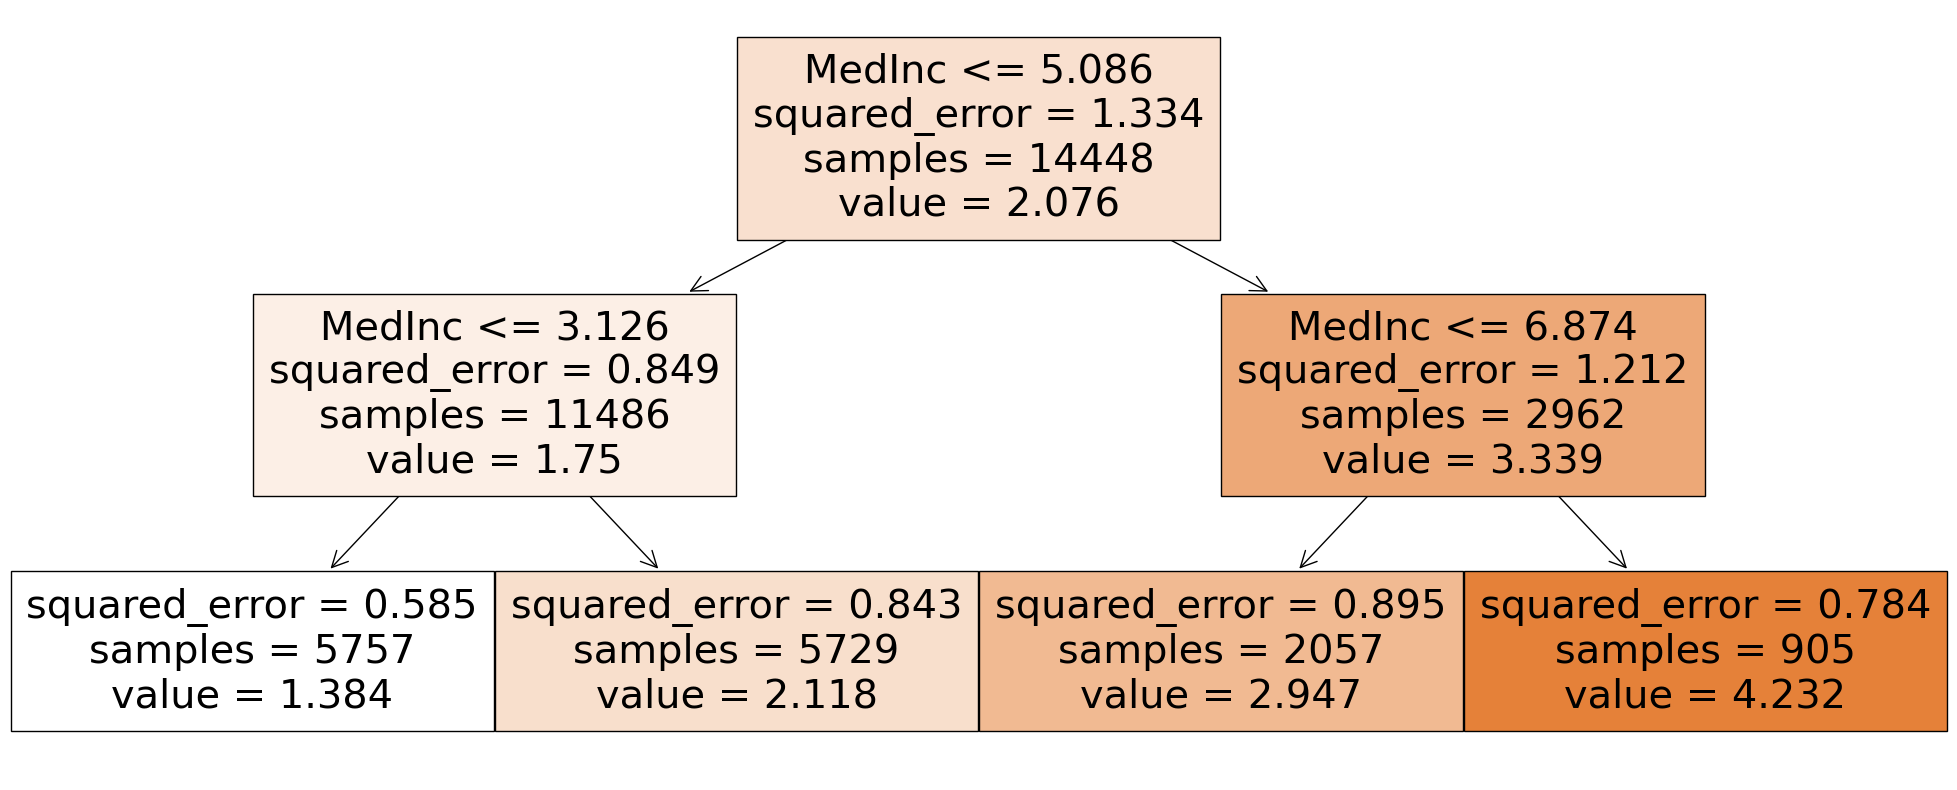

In [57]:
plt.rc('figure', figsize=(25, 10))
tp = tree.plot_tree(regr_2, 
                    feature_names=list(x.columns),  
                    filled=True) 

In [59]:
tree_text = tree.export_text(regr_1)
print(tree_text)

|--- feature_0 <= 5.09
|   |--- feature_0 <= 3.13
|   |   |--- feature_5 <= 2.16
|   |   |   |--- feature_6 <= 37.94
|   |   |   |   |--- feature_7 <= -118.24
|   |   |   |   |   |--- feature_6 <= 34.63
|   |   |   |   |   |   |--- feature_5 <= 1.57
|   |   |   |   |   |   |   |--- feature_7 <= -118.31
|   |   |   |   |   |   |   |   |--- value: [3.83]
|   |   |   |   |   |   |   |--- feature_7 >  -118.31
|   |   |   |   |   |   |   |   |--- value: [2.41]
|   |   |   |   |   |   |--- feature_5 >  1.57
|   |   |   |   |   |   |   |--- feature_4 <= 296.00
|   |   |   |   |   |   |   |   |--- value: [1.36]
|   |   |   |   |   |   |   |--- feature_4 >  296.00
|   |   |   |   |   |   |   |   |--- value: [2.94]
|   |   |   |   |   |--- feature_6 >  34.63
|   |   |   |   |   |   |--- feature_7 <= -122.36
|   |   |   |   |   |   |   |--- feature_0 <= 2.94
|   |   |   |   |   |   |   |   |--- value: [3.18]
|   |   |   |   |   |   |   |--- feature_0 >  2.94
|   |   |   |   |   |   |   |   |--- v

A mais importante é a feature_0